# Cross-Validation in scikit-learn example

In [ ]:
#code adapted from https://github.com/thomasjpfan/ml-workshop-intermediate-1-of-2

In [1]:
import seaborn as sns
import sklearn
sns.set_theme(context="notebook", font_scale=1.2,
              rc={"figure.figsize": [10, 6]})
sklearn.set_config(display="diagram")

## Load sample data

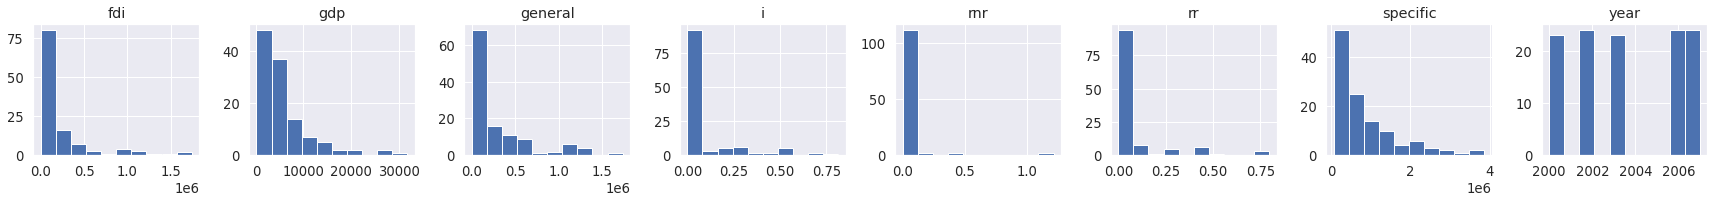

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/Kearney_Data_Science/master/_notebooks/df_panel_fix.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

df=df.dropna()

df.isnull().sum()

df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['it', 'Unnamed: 0'], axis = 1), df['it']


X = X.select_dtypes(include='number')
X



_ = X.hist(figsize=(30, 15), layout=(5, 8))

In [5]:
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

df=df.dropna()

df.isnull().sum()

df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['stroke', 'id'], axis = 1), df['stroke']


X = X.select_dtypes(include='number')
X

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Cross validation for model selection

### Try DummyClassifier

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [8]:
dummy_clf = DummyClassifier(strategy="prior")
dummy_scores = cross_val_score(dummy_clf, X_train, y_train)

In [9]:
dummy_scores

array([0.98119697, 0.98119697, 0.98119697, 0.98096767, 0.98119266])

In [10]:
dummy_scores.mean()

0.981150249606079

### Try KNeighborsClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

knc = make_pipeline(StandardScaler(), KNeighborsClassifier())
knc_scores = cross_val_score(knc, X_train, y_train)

In [12]:
knc_scores

array([0.98073836, 0.98096767, 0.98050906, 0.98096767, 0.9809633 ])

In [13]:
knc_scores.mean()

0.980829211800172

### Try LogisticRegression

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0)
)

In [16]:
log_reg_scores = cross_val_score(log_reg, X_train, y_train)

In [17]:
log_reg_scores

array([0.98119697, 0.98119697, 0.98119697, 0.98096767, 0.98119266])

In [18]:
log_reg_scores.mean()

0.981150249606079

### Which model do we choose?

1. Dummy
2. KNeighborsClassifier
3. LogisticRegression

In [41]:
y.value_counts()


dummy_scores = cross_val_score(dummy_clf, X_train, y_train, scoring="roc_auc")
dummy_scores.mean()

knc_scores = cross_val_score(knc, X_train, y_train, scoring="roc_auc")
knc_scores.mean()

0.5880984927926187

## Cross validation Strategies

### KFold

In [20]:
from sklearn.model_selection import KFold

cross_val_score(log_reg, X_train, y_train, cv=KFold(n_splits=4))

array([0.97982022, 0.98275546, 0.98183819, 0.98018712])

## Repeated KFold

In [21]:
from sklearn.model_selection import RepeatedKFold

scores = cross_val_score(log_reg, X_train, y_train,
                         cv=RepeatedKFold(n_splits=4, n_repeats=2))

In [22]:
scores

array([0.98238855, 0.9787195 , 0.98348927, 0.98000367, 0.98018712,
       0.98018712, 0.98128784, 0.98293891])

In [23]:
scores.shape

(8,)

## StratifiedKFold

In [24]:
from sklearn.model_selection import StratifiedKFold

scores = cross_val_score(log_reg, X_train, y_train,
                         cv=StratifiedKFold(n_splits=4))

In [25]:
scores

array([0.98128784, 0.98110438, 0.98110438, 0.98110438])

This is a binary classification problem:

In [26]:
y.value_counts()

0    28524
1      548
Name: stroke, dtype: int64

Scikit-learn will use `StratifiedKFold` by default:

In [27]:
cross_val_score(log_reg, X_train, y_train, cv=4)

array([0.98128784, 0.98110438, 0.98110438, 0.98110438])

## RepeatedStratifiedKFold

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold

scores = cross_val_score(
    log_reg, X_train, y_train,
    cv=RepeatedStratifiedKFold(n_splits=4, n_repeats=3))

In [29]:
scores

array([0.98128784, 0.98110438, 0.98110438, 0.98110438, 0.98128784,
       0.98110438, 0.98110438, 0.98110438, 0.98128784, 0.98110438,
       0.98110438, 0.98110438])

In [30]:
scores.shape

(12,)

In [38]:
# %load solutions/01-ex02-solutions.py
from sklearn.model_selection import cross_validate

results = cross_validate(log_reg, X_train, y_train, cv=4)
results

import pandas as pd
pd.DataFrame(results)

more_results = cross_validate(log_reg, X_train, y_train, cv=4, scoring=["f1", "accuracy"])

pd.DataFrame(more_results)


,fit_time,score_time,test_f1,test_accuracy
0,0.039663,0.007991,0.0,0.981288
1,0.038163,0.007970,0.0,0.981104
2,0.040289,0.008049,0.0,0.981104
3,0.038140,0.007756,0.0,0.981104


### Appendix: TimeSeriesSplit

In [32]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

X = np.arange(10)

In [33]:
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 2 3] TEST: [4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]


With `gap=2`: